In [13]:
#Import relevant packages

import os
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import  Dense, Dropout, Activation, Input, Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
# from tensorflow.keras.layers.normalization import BatchNormalization # new!
import cv2
from skimage.color import rgb2gray
from skimage import color
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn.metrics import classification_report

In [2]:
# Function provided by the GTSRB http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset
# function for reading the images
# arguments: path to the traffic sign data, for example './GTSRB/Training'
# returns: list of images, list of corresponding labels

def readTrafficSigns(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        gtFile = open(prefix + 'GT-'+ format(c, '05d') + '.csv') # annotations file
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            images.append(plt.imread(prefix + row[0])) # the 1th column is the filename
            labels.append(row[7]) # the 8th column is the label
        gtFile.close()
    return images, labels

# Run above function to import images and labels for training
trainImages, trainLabels = readTrafficSigns("../data/train/GTSRB/Final_Training/Images")


In [3]:
# Import test images

def readTestData(rootpath):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    prefix = rootpath + '/' # subdirectory for class
    gtFile = open(prefix + 'GT-final_test.csv') # annotations file
    gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
    next(gtReader) # skip header
    # loop over all images in current annotations file
    for row in gtReader:
        images.append(plt.imread(prefix + 'GTSRB/Final_Test/Images/' + row[0])) # the 1th column is the filename
        labels.append(row[7]) # the 8th column is the label
    gtFile.close()
    return images, labels

# Run above function to import images and labels for testing
testImages, testLabels = readTestData('../data/test')

In [4]:
# Process training images
final_images=[]
dim = (40, 40) 
for l in range(len(trainImages)):
    temp_img = (cv2.resize(trainImages[l], dim))
    final_images.append(rgb2gray(temp_img))

X = np.array(final_images)
Y = np.array(trainLabels).astype(int)
X =X.reshape([-1,40, 40,1])

In [5]:
# Process testing images
final_test_images = []
dim = (40, 40)
for l in range(len(testImages)):
    temp_img = (cv2.resize(testImages[l], dim))
    final_test_images.append(rgb2gray(temp_img))
    
X_test = np.array(final_test_images)
Y_test = np.array(testLabels).astype(int)
X_test =X_test.reshape([-1,40, 40,1])

In [6]:
# Create a sequential model for the DNN
model = Sequential()
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Dense(32))

model.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 18, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [7]:
# Train the model on the training data
model.fit(X, Y,epochs=15,verbose=1)

Train on 39209 samples
Epoch 1/15
39209/39209 [==============================] - 179s 5ms/sample - loss: 3.5353 - accuracy: 0.0602
Epoch 2/15
39209/39209 [==============================] - 185s 5ms/sample - loss: 3.3472 - accuracy: 0.1070
Epoch 3/15
39209/39209 [==============================] - 182s 5ms/sample - loss: 2.1180 - accuracy: 0.4165
Epoch 4/15
39209/39209 [==============================] - 178s 5ms/sample - loss: 1.0354 - accuracy: 0.6871
Epoch 5/15
39209/39209 [==============================] - 179s 5ms/sample - loss: 0.6091 - accuracy: 0.8095
Epoch 6/15
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.4018 - accuracy: 0.8743
Epoch 7/15
39209/39209 [==============================] - 177s 5ms/sample - loss: 0.2997 - accuracy: 0.9048
Epoch 8/15
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.2386 - accuracy: 0.9239
Epoch 9/15
39209/39209 [==============================] - 178s 5ms/sample - loss: 0.1933 - accuracy: 0.9392
Epoch

In [8]:
# Evaluate the model on the testing data
model.evaluate(X_test, Y_test)

12630/12630 [==============================] - 14s 1ms/sample - loss: 0.2070 - accuracy: 0.9546


[0.20704611994610747, 0.9546318]

In [9]:
# Save the model for future use
model.save("./resources/Model.h5")

In [10]:
# Load the model in future use
model = tf.keras.models.load_model("./resources/Model.h5")

In [11]:
# Function to test the model on a set of manipulated images
# argument: Type of manipulated images to test on
# following options for the argument:
# - Blur
# - Distort
# - OnePixel
# - Ripple
# - Rotate
# - saltNppr
def testModelOnManipulatedImages(type):
    TempImages = []
    Images = []
    Labels = []
    dim = (40,40)
    path = '../data/GTSRB_test_manipulated/' + type
    for file in os.listdir(path):
        TempImages.append(plt.imread(path + '/' + file))
        Labels.append(int(file[:2]))
    for x in range(len(TempImages)):
        tempImg = (cv2.resize(TempImages[x], dim))
        Images.append(rgb2gray(tempImg))
    Images = np.array(Images).reshape([-1,40,40,1])
    # show one image as an example
    plt.imshow(Images[0].reshape(40,40))
    y_pred = model.predict(Images, verbose=1)
    pred_argmax = np.argmax(y_pred, axis=1)
    print(classification_report(Labels, pred_argmax))

12630/12630 [==============================] - 21s 2ms/sample
              precision    recall  f1-score   support

           0       1.00      0.27      0.42        60
           1       0.87      0.83      0.85       720
           2       0.92      0.73      0.82       750
           3       0.47      0.86      0.61       450
           4       0.88      0.71      0.79       660
           5       0.66      0.47      0.55       630
           6       0.99      0.74      0.85       150
           7       0.97      0.60      0.74       450
           8       0.77      0.61      0.68       450
           9       0.96      0.83      0.89       480
          10       0.98      0.75      0.85       660
          11       0.90      0.78      0.84       420
          12       0.76      0.92      0.83       690
          13       0.81      0.99      0.89       720
          14       1.00      0.86      0.92       270
          15       0.25      0.99      0.40       210
          16       

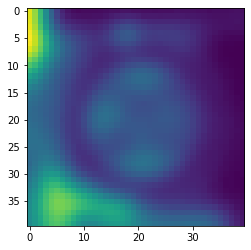

In [14]:
testModelOnManipulatedImages('Blur')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.58      0.75      0.65        60
           1       0.83      0.88      0.85       720
           2       0.89      0.77      0.83       750
           3       0.81      0.88      0.85       450
           4       0.83      0.86      0.85       660
           5       0.85      0.71      0.77       630
           6       0.87      0.79      0.83       150
           7       0.67      0.83      0.74       450
           8       0.75      0.86      0.80       450
           9       0.94      0.97      0.95       480
          10       0.98      0.92      0.95       660
          11       0.82      0.87      0.85       420
          12       0.95      0.98      0.97       690
          13       0.99      0.99      0.99       720
          14       0.99      0.91      0.95       270
          15       0.88      0.93      0.91       210
          16       

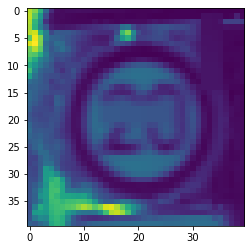

In [15]:
testModelOnManipulatedImages('Distort')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        60
           1       0.92      0.99      0.96       720
           2       0.94      0.98      0.96       750
           3       0.92      0.95      0.94       450
           4       0.97      0.94      0.96       660
           5       0.93      0.93      0.93       630
           6       1.00      0.91      0.95       150
           7       0.96      0.95      0.96       450
           8       0.97      0.99      0.98       450
           9       0.97      0.98      0.98       480
          10       0.99      0.98      0.98       660
          11       0.93      0.94      0.93       420
          12       0.97      0.99      0.98       690
          13       1.00      1.00      1.00       720
          14       1.00      0.89      0.94       270
          15       0.98      0.98      0.98       210
          16       

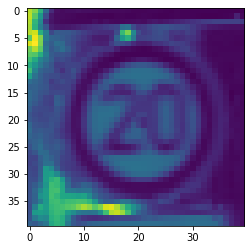

In [16]:
testModelOnManipulatedImages('OnePixel')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.06      0.04      0.05       720
           2       0.20      0.08      0.11       750
           3       0.02      0.01      0.01       450
           4       0.03      0.00      0.01       660
           5       0.11      0.02      0.03       630
           6       0.07      0.01      0.01       150
           7       0.14      0.12      0.13       450
           8       0.32      0.07      0.11       450
           9       0.08      0.05      0.06       480
          10       0.40      0.04      0.07       660
          11       0.05      0.02      0.03       420
          12       0.18      0.15      0.16       690
          13       0.07      0.18      0.10       720
          14       0.15      0.04      0.06       270
          15       0.15      0.03      0.05       210
          16       

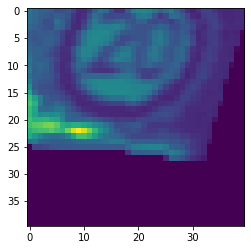

In [17]:
testModelOnManipulatedImages('Ripple')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       1.00      0.77      0.87        60
           1       0.86      0.85      0.85       720
           2       0.76      0.91      0.83       750
           3       0.71      0.97      0.82       450
           4       0.98      0.71      0.83       660
           5       0.92      0.77      0.84       630
           6       1.00      0.62      0.77       150
           7       0.89      0.87      0.88       450
           8       0.90      0.89      0.90       450
           9       0.70      0.93      0.80       480
          10       0.88      0.70      0.78       660
          11       0.89      0.84      0.86       420
          12       0.86      0.97      0.91       690
          13       0.98      0.99      0.98       720
          14       0.96      0.79      0.87       270
          15       0.91      0.99      0.95       210
          16       

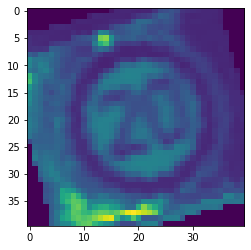

In [18]:
testModelOnManipulatedImages('Rotate')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.28      0.62      0.39        60
           1       0.49      0.87      0.63       720
           2       0.56      0.67      0.61       750
           3       0.60      0.38      0.47       450
           4       0.63      0.33      0.43       660
           5       0.66      0.41      0.51       630
           6       0.69      0.27      0.38       150
           7       0.67      0.35      0.46       450
           8       0.52      0.37      0.43       450
           9       0.74      0.72      0.73       480
          10       0.79      0.46      0.58       660
          11       0.72      0.84      0.77       420
          12       0.63      0.78      0.70       690
          13       0.91      0.94      0.92       720
          14       0.89      0.76      0.82       270
          15       0.89      0.73      0.80       210
          16       

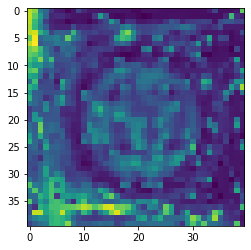

In [19]:
testModelOnManipulatedImages('saltNppr')

In [20]:
def readyImage(path):
    image = plt.imread(path)
    image = cv2.resize(image, dim)
    image = rgb2gray(image)
    plt.imshow(image, cmap='gray')
    image = image.reshape(-1, 40, 40, 1)
    return image

In [21]:
# Set labels for further reference
labels = ['Speed limit (20)']
labels.append('Speed limit (30)')
labels.append('Speed limit (50)')
labels.append('Speed limit (60)')
labels.append('Speed limit (70)')
labels.append('Speed limit (80)')
labels.append('End of speed limit (80)')
labels.append('Speed limit (100)')
labels.append('Speed limit (120)')
labels.append('No passing')
labels.append('No passing for vehicles over 3.5 tons')
labels.append('Right-of-way at the next intersection')
labels.append('Priority road')
labels.append('Yield')
labels.append('Stop')
labels.append('No vehicles')
labels.append('Vehicles over 3.5 tons prohibited')
labels.append('No entry - one way')
labels.append('General Caution')
labels.append('Dangerous curve to the left')
labels.append('Dangerous curve to the right')
labels.append('Double curve')
labels.append('Bumpy road')
labels.append('Slippery road')
labels.append('Road narrows on the right')
labels.append('Road work')
labels.append('Traffic signals')
labels.append('Pedestrians')
labels.append('Children crossing')
labels.append('Bicycles crossing')
labels.append('Beware of ice/snow')
labels.append('Wild animals crossing')
labels.append('End of all speed and passing limits')
labels.append('Turn right ahead')
labels.append('Turn left ahead')
labels.append('Ahead only')
labels.append('Go straight or right')
labels.append('Go straight or left')
labels.append('Keep right')
labels.append('Keep left')
labels.append('Roundabout mandatory')
labels.append('End of no passing')
labels.append('End of no passing by vehicles over 3.5 tons')

In [22]:
# Add set of manipulated images to the training data for a new model
tmpNewImages = []
tmpNewLabels = []

rootpath = '../data/manipulated_train'
for folder in os.listdir(rootpath):
    path = rootpath + '/'  + folder
    for file in os.listdir(path):
        tmpNewImages.append(plt.imread(path + '/' + file))
        tmpNewLabels.append(int(file[:2]))


finalNewImages=[]
dim = (40, 40) 
for l in range(len(tmpNewImages)):
    temp_img = (cv2.resize(tmpNewImages[l], dim))
    finalNewImages.append(rgb2gray(temp_img))

    
X_new = np.array(finalNewImages)
Y_new = np.array(tmpNewLabels)
X_new =X_new.reshape([-1,40, 40,1])
Y_new =Y_new.astype(int)
Y_new.dtype
    

newTrainImages = np.concatenate((X, X_new))
newTrainLabels = np.concatenate((Y, Y_new))

In [23]:
# Create a new model, identical to the prior model
model_new = Sequential()
model_new.add(tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(40,40,1)))

model_new.add(Conv2D(32, (3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model_new.add(Conv2D(64, (3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Dense(32))

model_new.add(Conv2D(128, (3, 3), padding='same',activation='relu'))
model_new.add(Conv2D(128, (3, 3), activation='relu'))
model_new.add(MaxPooling2D(pool_size=(2, 2)))
model_new.add(Dropout(0.25))

model_new.add(Flatten())
model_new.add(Dense(512, activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(43, activation='softmax'))

model_new.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 38, 38, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)         

In [24]:
# Train said model on the new training set including manipulated images
model_new.fit(newTrainImages, newTrainLabels,epochs=15,verbose=1)

Train on 86465 samples
Epoch 1/15
86465/86465 [==============================] - 419s 5ms/sample - loss: 3.5394 - accuracy: 0.0551
Epoch 2/15
86465/86465 [==============================] - 404s 5ms/sample - loss: 3.5016 - accuracy: 0.0554
Epoch 3/15
86465/86465 [==============================] - 402s 5ms/sample - loss: 3.4625 - accuracy: 0.0712
Epoch 4/15
86465/86465 [==============================] - 401s 5ms/sample - loss: 3.2654 - accuracy: 0.1272
Epoch 5/15
86465/86465 [==============================] - 396s 5ms/sample - loss: 1.9628 - accuracy: 0.4422
Epoch 6/15
86465/86465 [==============================] - 393s 5ms/sample - loss: 1.0068 - accuracy: 0.6968
Epoch 7/15
86465/86465 [==============================] - 5813s 67ms/sample - loss: 0.6849 - accuracy: 0.7905
Epoch 8/15
86465/86465 [==============================] - 431s 5ms/sample - loss: 0.5155 - accuracy: 0.8414
Epoch 9/15
86465/86465 [==============================] - 393s 5ms/sample - loss: 0.4171 - accuracy: 0.8719
Epo

In [25]:
# Evaluate the new model on the original test data
model_new.evaluate(X_test, Y_test)

12630/12630 [==============================] - 15s 1ms/sample - loss: 0.1651 - accuracy: 0.9563


[0.16510977250857903, 0.95629454]

In [26]:
# Save model for future use
model_new.save("./resources/Model_New.h5")

In [27]:
# Load model
model_new = tf.keras.models.load_model("./resources/Model_New.h5")

In [28]:
# Function to test the new model on a set of manipulated images
# argument: Type of manipulated images to test on
# following options for the argument:
# - Blur
# - Distort
# - OnePixel
# - Ripple
# - Rotate
# - saltNppr
def testNewModelOnManipulatedImages(type):
    TempImages = []
    Images = []
    Labels = []
    dim = (40,40)
    path = '../data/GTSRB_test_manipulated/' + type
    for file in os.listdir(path):
        TempImages.append(plt.imread(path + '/' + file))
        Labels.append(int(file[:2]))
    for x in range(len(TempImages)):
        tempImg = (cv2.resize(TempImages[x], dim))
        Images.append(rgb2gray(tempImg))
    Images = np.array(Images).reshape([-1,40,40,1])
    # show one image as an example
    plt.imshow(Images[0].reshape(40,40))
    y_pred = model_new.predict(Images, verbose=1)
    pred_argmax = np.argmax(y_pred, axis=1)
    print(classification_report(Labels, pred_argmax))

12630/12630 [==============================] - 15s 1ms/sample
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        60
           1       0.91      0.75      0.82       720
           2       0.85      0.71      0.77       750
           3       0.62      0.58      0.60       450
           4       0.86      0.64      0.73       660
           5       0.73      0.56      0.63       630
           6       0.95      0.63      0.76       150
           7       0.93      0.53      0.67       450
           8       0.66      0.62      0.64       450
           9       0.77      0.87      0.81       480
          10       0.93      0.81      0.86       660
          11       0.98      0.87      0.92       420
          12       0.66      0.91      0.77       690
          13       0.91      0.99      0.95       720
          14       0.97      0.85      0.91       270
          15       0.20      0.98      0.33       210
          16       

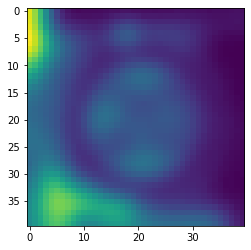

In [29]:
testNewModelOnManipulatedImages('Blur')

12630/12630 [==============================] - 14s 1ms/sample
              precision    recall  f1-score   support

           0       0.70      0.55      0.62        60
           1       0.91      0.88      0.89       720
           2       0.90      0.86      0.88       750
           3       0.84      0.86      0.85       450
           4       0.87      0.88      0.88       660
           5       0.83      0.74      0.78       630
           6       0.90      0.77      0.83       150
           7       0.78      0.80      0.79       450
           8       0.73      0.83      0.77       450
           9       0.86      0.99      0.92       480
          10       0.98      0.92      0.95       660
          11       0.93      0.89      0.91       420
          12       0.96      0.98      0.97       690
          13       1.00      1.00      1.00       720
          14       0.97      0.97      0.97       270
          15       0.83      0.92      0.88       210
          16       

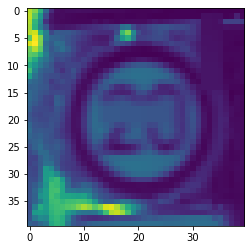

In [30]:
testNewModelOnManipulatedImages('Distort')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        60
           1       0.97      0.98      0.98       720
           2       0.98      0.98      0.98       750
           3       0.90      0.92      0.91       450
           4       0.97      0.97      0.97       660
           5       0.92      0.95      0.94       630
           6       1.00      0.78      0.88       150
           7       0.97      0.93      0.95       450
           8       0.96      0.97      0.96       450
           9       0.98      1.00      0.99       480
          10       0.99      0.98      0.98       660
          11       0.97      1.00      0.98       420
          12       0.96      0.99      0.97       690
          13       1.00      1.00      1.00       720
          14       0.97      0.97      0.97       270
          15       0.96      0.98      0.97       210
          16       

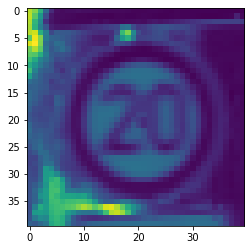

In [31]:
testNewModelOnManipulatedImages('OnePixel')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.53      0.15      0.23        60
           1       0.71      0.54      0.62       720
           2       0.74      0.50      0.60       750
           3       0.52      0.13      0.21       450
           4       0.64      0.45      0.53       660
           5       0.41      0.50      0.45       630
           6       0.45      0.09      0.15       150
           7       0.58      0.30      0.39       450
           8       0.20      0.41      0.26       450
           9       0.43      0.55      0.49       480
          10       0.63      0.66      0.64       660
          11       0.46      0.28      0.35       420
          12       0.59      0.62      0.61       690
          13       0.51      0.88      0.65       720
          14       0.69      0.54      0.61       270
          15       0.56      0.73      0.63       210
          16       

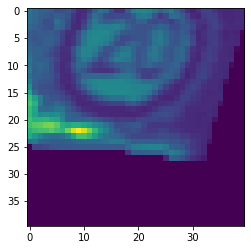

In [32]:
testNewModelOnManipulatedImages('Ripple')

12630/12630 [==============================] - 13s 1ms/sample
              precision    recall  f1-score   support

           0       0.89      0.40      0.55        60
           1       0.92      0.87      0.90       720
           2       0.85      0.95      0.90       750
           3       0.79      0.95      0.86       450
           4       0.97      0.88      0.92       660
           5       0.85      0.86      0.86       630
           6       0.97      0.57      0.72       150
           7       0.97      0.74      0.84       450
           8       0.82      0.90      0.85       450
           9       0.95      0.94      0.94       480
          10       0.98      0.95      0.97       660
          11       0.96      0.94      0.95       420
          12       0.91      0.99      0.95       690
          13       0.98      0.98      0.98       720
          14       0.85      0.95      0.90       270
          15       0.87      0.99      0.93       210
          16       

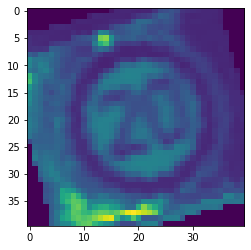

In [33]:
testNewModelOnManipulatedImages('Rotate')

12630/12630 [==============================] - 14s 1ms/sample
              precision    recall  f1-score   support

           0       0.73      0.40      0.52        60
           1       0.78      0.81      0.80       720
           2       0.71      0.73      0.72       750
           3       0.45      0.62      0.52       450
           4       0.69      0.57      0.62       660
           5       0.60      0.54      0.57       630
           6       0.82      0.47      0.60       150
           7       0.69      0.42      0.53       450
           8       0.44      0.54      0.48       450
           9       0.84      0.83      0.83       480
          10       0.92      0.64      0.76       660
          11       0.88      0.88      0.88       420
          12       0.69      0.92      0.79       690
          13       0.92      0.98      0.95       720
          14       0.79      0.90      0.84       270
          15       0.79      0.84      0.81       210
          16       

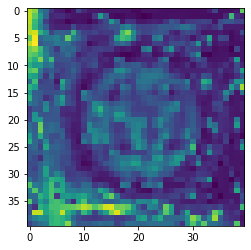

In [34]:
testNewModelOnManipulatedImages('saltNppr')